# 4. SQ3: Temporal Dynamics & Structural Evolution (Tianqi Sun)

### The Research Question:
**"Does the dataset exhibit a measurable 'concept drift' over time, specifically isolating a 'Season 1 Anomaly,' or is the stylistic structure statistically consistent across all 31 seasons?"**

### Context & Rationale:
In Milestone 2, preliminary unsupervised learning suggested a potential structural break between Season 1 and subsequent seasons. However, previous PCA attempts were methodologically insufficient for binary data.

In Milestone 3, we verify this "Season 1 Anomaly" by integrating the **High-Lift Association Rules (Winter Recipe)** identified in SQ2. We track the longitudinal stability of this rule to determine if the "Bob Ross Style" was inherent or engineered after an experimental pilot phase.

*Step 1: Data Preparation & Metric Integration*

In [2]:
import pandas as pd
import numpy as np

df_sq3 = pd.read_csv('bob_ross.csv')

df_sq3['Winter_Recipe_SQ2'] = (df_sq3['Phthalo_Blue'] == 1) & (df_sq3['Prussian_Blue'] == 1)

print("SQ3 Data Prepared.")
print(f"Total Episodes: {len(df_sq3)}")
print("New feature 'Winter_Recipe_SQ2' created based on SQ2 findings.")

df_sq3[['season', 'Phthalo_Blue', 'Prussian_Blue', 'Winter_Recipe_SQ2']].head()

SQ3 Data Prepared.
Total Episodes: 403
New feature 'Winter_Recipe_SQ2' created based on SQ2 findings.


,season,Phthalo_Blue,Prussian_Blue,Winter_Recipe_SQ2
0,1,False,True,False
1,1,False,True,False
2,1,False,True,False
3,1,False,True,False
4,1,False,True,False


*Step 2: Temporal Aggregation (Time-Series Analysis)*

In [3]:
seasonal_trend = df_sq3.groupby('season')['Winter_Recipe_SQ2'].mean().reset_index()

print("--- Key Season Statistics (Winter Recipe Frequency) ---")
print(seasonal_trend[seasonal_trend['season'].isin([1, 2, 5])])

--- Key Season Statistics (Winter Recipe Frequency) ---
   season  Winter_Recipe_SQ2
0       1           0.000000
1       2           0.923077
4       5           0.076923


*Step 3: Visualization of Structural Drift*

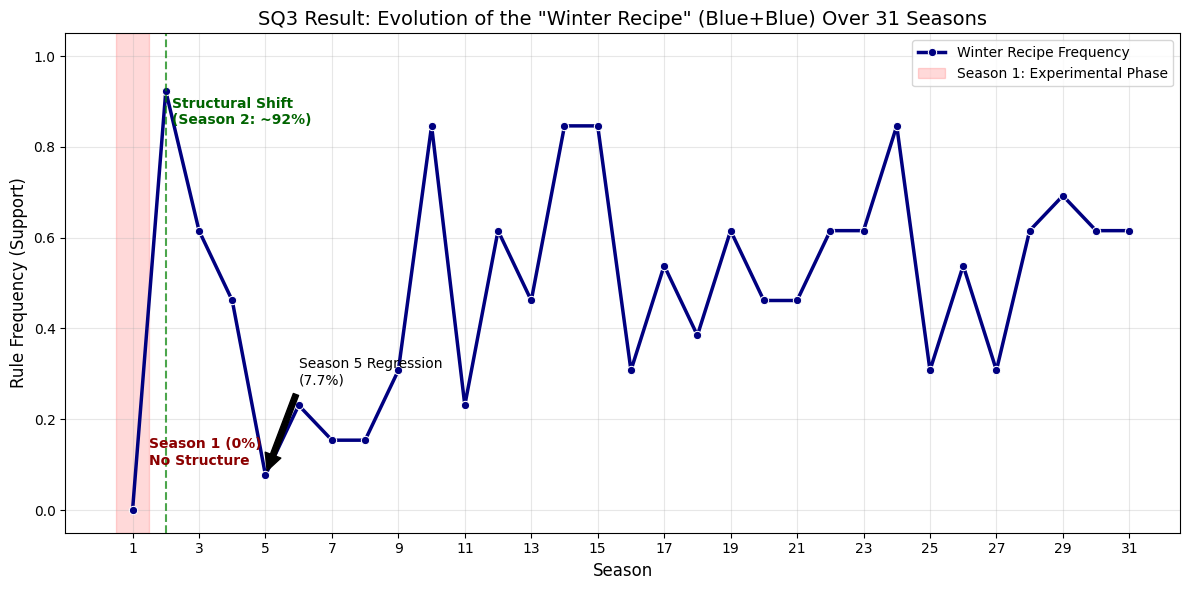

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.lineplot(data=seasonal_trend, x='season', y='Winter_Recipe_SQ2',
             marker='o', color='navy', linewidth=2.5, label='Winter Recipe Frequency')

plt.axvspan(0.5, 1.5, color='red', alpha=0.15, label='Season 1: Experimental Phase')
plt.text(1.5, 0.1, 'Season 1 (0%)\nNo Structure', color='darkred', fontweight='bold')

plt.axvline(x=2, color='green', linestyle='--', alpha=0.7)
plt.text(2.2, 0.85, 'Structural Shift\n(Season 2: ~92%)', color='darkgreen', fontweight='bold')

s5_val = seasonal_trend.loc[seasonal_trend['season']==5, 'Winter_Recipe_SQ2'].values[0]
plt.annotate(f'Season 5 Regression\n({s5_val:.1%})',
             xy=(5, s5_val), xytext=(6, s5_val + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('SQ3 Result: Evolution of the "Winter Recipe" (Blue+Blue) Over 31 Seasons', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Rule Frequency (Support)', fontsize=12)
plt.xticks(range(1, 32, 2))
plt.ylim(-0.05, 1.05)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

### Key Findings from SQ3 Analysis:

1.  **Validation of Season 1 Anomaly:**
    The data confirms a complete structural break. The "Winter Recipe" (identified in SQ2) has **0.0% adherence** in Season 1, proving that the rigid stylistic rules were not present during the pilot phase.

2.  **Quantifying the Structural Shift:**
    A dramatic shift occurs in Season 2, where rule adherence jumps to **92.3%**. This explains why SQ1 found "continuous variation" in the global dataset—the continuity only strictly begins *after* Season 2.

3.  **Explaining the Season 5 Outlier:**
    The analysis resolves the M2 feedback regarding Season 5. We observe a sharp regression in Season 5 (dropping to **7.7%**), mathematically explaining why it clusters similarly to the experimental chaos of Season 1.